# Preliminary operations

## Import libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset

In [3]:
# importing dataset
df = pd.read_csv("drive/MyDrive/Progetto Data Mining 1/Dataset/ravdess_features.csv")
df_prep = df.copy()
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

#Data Preparation

##Remove useless data

In [4]:
nunique = df_prep.nunique()
cols_to_drop = nunique[nunique == 1].index
df_prep.drop(cols_to_drop, axis=1, inplace=True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            1636 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Delete high correlation variables

In [5]:
cor_matrix = df_prep.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)
df_prep.drop(df_prep[to_drop].columns, axis=1, inplace=True)

df_prep.info()

['frame_width', 'frame_count', 'mfcc_std', 'mfcc_min', 'sc_skew', 'stft_skew', 'std', 'min', 'max']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   int64  
 9   intensity            1636 non-null   float64
 10  zero_crossings_sum   2452 non-null   int64  
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   f

<ipython-input-5-b1e71245ce4f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


##Split Dataset

In [6]:
df = df_prep
# get data columns
df_data = df.loc[:, "length_ms":"skew"] 

In [7]:
X = df_data.dropna().drop("intensity", axis=1).values
y = df_data["intensity"].dropna().values
X_missing_values = df_data[df_data["intensity"].isna()].drop("intensity", axis=1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=0
)

In [8]:
print(len(X_train))
print(len(y_train))
print()
print(len(X_missing_values))

1472
1472

816


#Regression

##Import libraries

In [9]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler
# train, test, split
from sklearn.model_selection import train_test_split
# decision tree classifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
# repeated stratified kfold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
# randomized and grid search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Dummy clf
from sklearn.dummy import DummyRegressor

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

##Hyperparameters tuning

In [12]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X=None, y=y_train))

-0.007917016080284833


In [15]:
# GridSearchCV
param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 10],
    "max_depth": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50, None],
    "ccp_alpha": [0.00, 0.005, 0.01, 0.015, 0.020, 0.025, 0.05]
}

DTR = DecisionTreeRegressor(
        random_state = 0
)

RKF = RepeatedKFold(
        n_splits = 20, 
        n_repeats = 3, 
        random_state = 0
)

grid = RandomizedSearchCV(
    DTR,
    n_iter=750,
    param_distributions = param_grid,
    cv=RKF,
    n_jobs = -1,
    refit = True,
    verbose=1,
    random_state=0
)

# fit GridSearchCV
grid.fit(X_train, y_train)

Fitting 60 folds for each of 750 candidates, totalling 45000 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=20, random_state=0),
                   estimator=DecisionTreeRegressor(random_state=0), n_iter=750,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.005, 0.01, 0.015,
                                                      0.02, 0.025, 0.05],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 30, 40, 50,
                                                      None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 3, 4, 5, 10]},
                   random_state=0, verbose=1)

In [16]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 18, 'criterion': 'squared_error', 'ccp_alpha': 0.005}
0.7381993173453049
DecisionTreeRegressor(ccp_alpha=0.005, max_depth=18, min_samples_leaf=10,
                      min_samples_split=5, random_state=0)


###Test-set performance

In [20]:
DTR = DecisionTreeRegressor(
        criterion="squared_error",
        max_depth=18,
        ccp_alpha=0.005,
        random_state = 0,
        min_samples_split = 5,
        min_samples_leaf = 10
)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

DTR.fit(X_train, y_train)
y_pred_test = DTR.predict(X_test)

print(r2_score(y_pred_test, y_test))
print(mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

0.6825965123787605
3.217313792225321
18.066702902729837


##Predictions

In [ ]:
y_pred = DTR.predict(X_missing_values)

In [ ]:
len(y_pred)

816

In [ ]:
intensity_nan_index = df[df["intensity"].isna()]["intensity"].index

In [ ]:
df.loc[intensity_nan_index, "intensity"] = y_pred

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   int64  
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   int64  
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null   f

#Handle outliers

In [ ]:
df_data = df.loc[:, "length_ms":"skew"]

percentile25 = df_data.apply(lambda x: x.quantile(0.25))
percentile75 = df_data.apply(lambda x: x.quantile(0.75))
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_data_outliers = df_data[(df_data < upper_limit) & (df_data > lower_limit)]
df.loc[:, "length_ms":"skew"] = df_data_outliers

df.info()

for col in df_data.columns:
    for grouping_list in [
      ["emotion", "emotional_intensity"],
      ["emotion"],
    ]:
      df[col] = df[col].fillna(
          value=df.groupby(grouping_list)[col].transform(
              "median"
              )
          )

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2441 non-null   float64
 9   intensity            2444 non-null   float64
 10  zero_crossings_sum   2400 non-null   float64
 11  mfcc_mean            2440 non-null   float64
 12  mfcc_max             2451 non-null   float64
 13  sc_mean              2447 non-null   float64
 14  sc_std               2422 non-null   float64
 15  sc_min               2452 non-null   f

#Classification

In [ ]:
df_data = df.loc[:, "length_ms":"skew"]
X = df_data.values

y_emotion = df["emotion"]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_ms           2452 non-null   float64
 1   intensity           2452 non-null   float64
 2   zero_crossings_sum  2452 non-null   float64
 3   mfcc_mean           2452 non-null   float64
 4   mfcc_max            2452 non-null   float64
 5   sc_mean             2452 non-null   float64
 6   sc_std              2452 non-null   float64
 7   sc_min              2452 non-null   float64
 8   sc_max              2452 non-null   float64
 9   sc_kur              2452 non-null   float64
 10  stft_mean           2452 non-null   float64
 11  stft_std            2452 non-null   float64
 12  stft_min            2452 non-null   float64
 13  stft_kur            2452 non-null   float64
 14  mean                2452 non-null   float64
 15  kur                 2452 non-null   float64
 16  skew  

##All emphasis

In [ ]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# optimized Decision Tree DT
DT = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 10, 
    min_samples_leaf = 1,
    min_samples_split = 2,
    class_weight="balanced",
    random_state=0
)

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.54      0.41      0.47        75
        calm       0.47      0.48      0.47        75
     disgust       0.30      0.38      0.34        39
     fearful       0.35      0.37      0.36        75
       happy       0.36      0.36      0.36        75
     neutral       0.28      0.34      0.31        38
         sad       0.35      0.25      0.29        75
   surprised       0.33      0.44      0.37        39

    accuracy                           0.38       491
   macro avg       0.37      0.38      0.37       491
weighted avg       0.39      0.38      0.38       491



In [ ]:
y_test_pred_proba = DT.predict_proba(X_test)

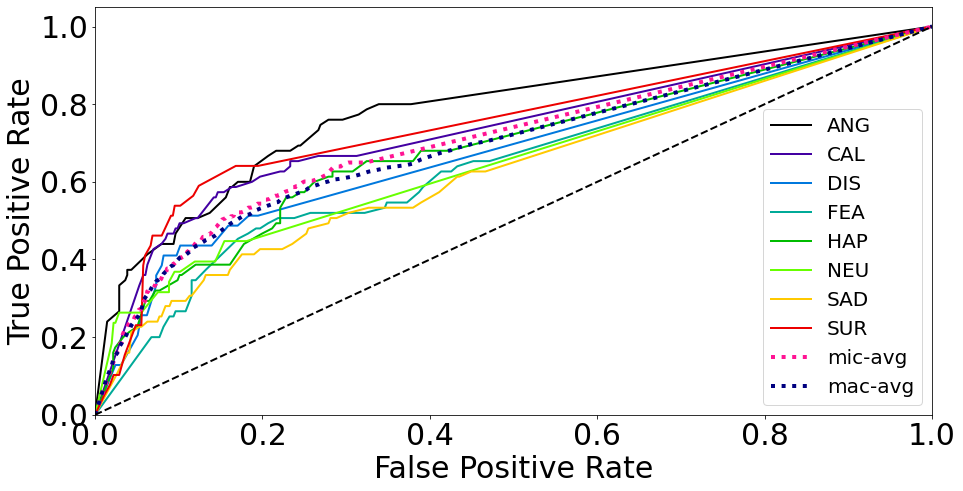

0.6928140002674656


In [ ]:
plot_roc(y_test, DT.predict_proba(X_test), figsize=(15, 7.5), text_fontsize=30, title=None)
plt.legend(["ANG", "CAL", "DIS", "FEA", "HAP", "NEU", "SAD", "SUR", "mic-avg", "mac-avg"], fontsize=20)

plt.savefig("DT_roc_curve.svg", format="svg")
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

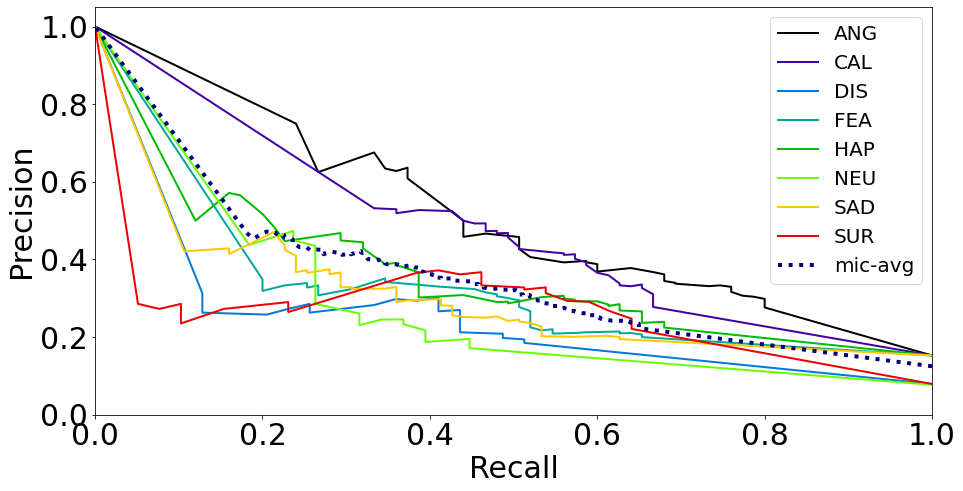

In [ ]:

plot_precision_recall(y_test, DT.predict_proba(X_test), figsize=(15, 7.5), text_fontsize=30, title=None)
plt.legend(["ANG", "CAL", "DIS", "FEA", "HAP", "NEU", "SAD", "SUR", "mic-avg"], fontsize=20)
plt.xlabel("Recall", fontsize=30)
plt.ylabel("Precision", fontsize=30)

plt.savefig("DT_precision_recall.svg", format="svg")
plt.show()

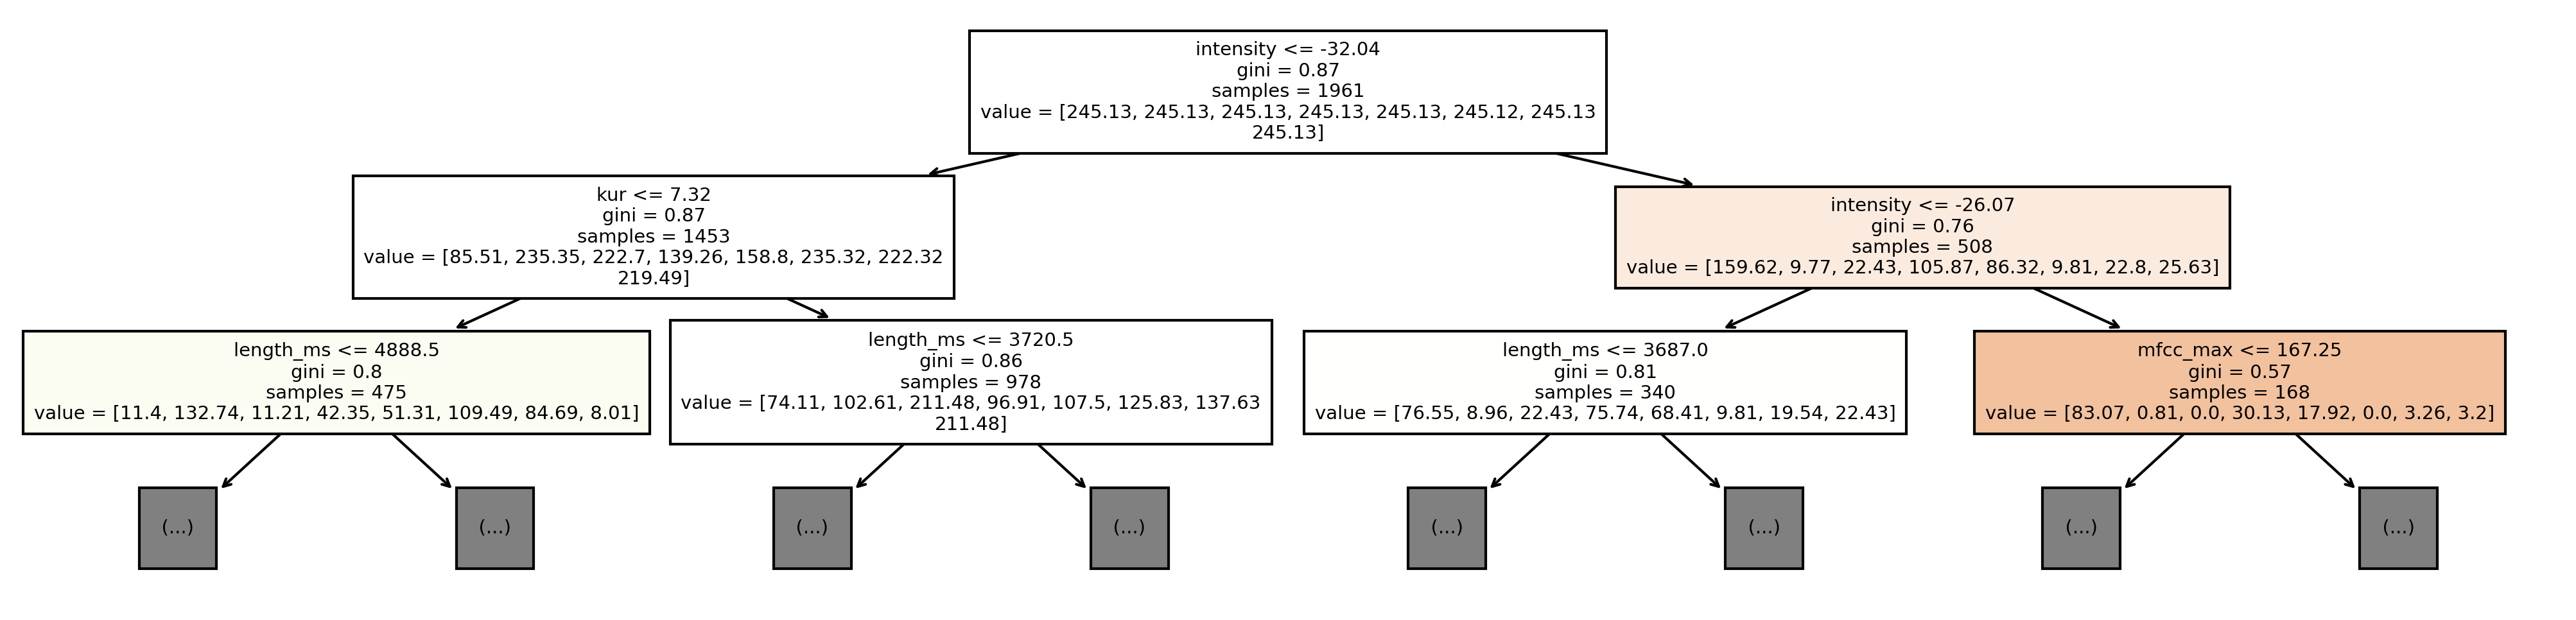

In [ ]:
plt.figure(figsize=(17, 4), dpi=300)
plot_tree(DT, feature_names=df_data.columns, filled=True,  max_depth=2, fontsize=7, precision=2)
plt.savefig("DT.svg", format="svg")
plt.show()